# Importing the libraries

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to [0, 1]

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to 784-dimensional vectors, as expected by the model

The MNIST dataset consists of grayscale images of hand-written digits, where each image is 28 pixels wide and 28 pixels tall. Therefore, each image has a total of 28x28=784 pixels.

In order to feed these images into a neural network, we need to flatten each image into a one-dimensional vector. This means that we convert each 28x28 image into a 784-dimensional vector, where each element of the vector represents the value of one pixel in the original image.

The reason we need to reshape the images into 784-dimensional vectors is because the first layer of our model expects an input of this shape. In the code example I provided, the first layer of our model is a Dense layer with 64 units and relu activation, which takes as input a 784-dimensional vector representing a flattened image. If we didn't reshape the images, we would get a shape mismatch error when trying to train the model.

In [18]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert the labels to one-hot encoding

In [19]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [22]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.9155 - val_loss: 0.1682 - val_accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9588 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.1094 - val_accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0964 - val_accuracy: 0.9704
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0954 - val_accuracy: 0.9716


# Make predictions on the first 10 images from the test set

In [23]:
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 44ms/step


# Convert the predictions from one-hot encoding to integers

In [24]:
predicted_labels = np.argmax(predictions, axis=1)

# Show the images, their predicted labels, and their true labels

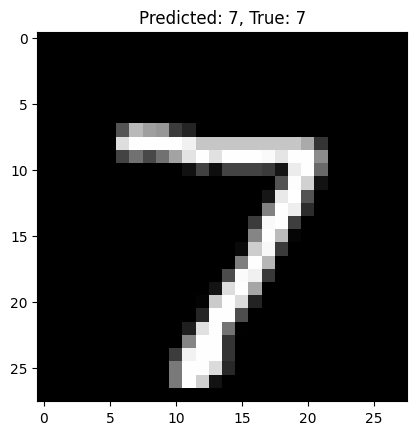

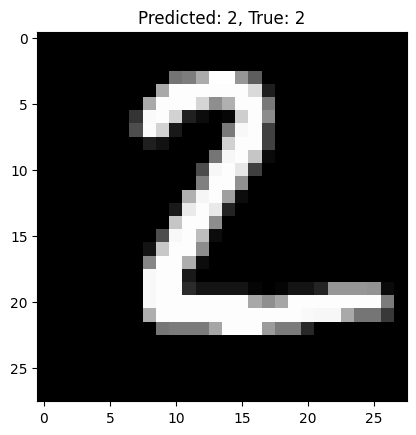

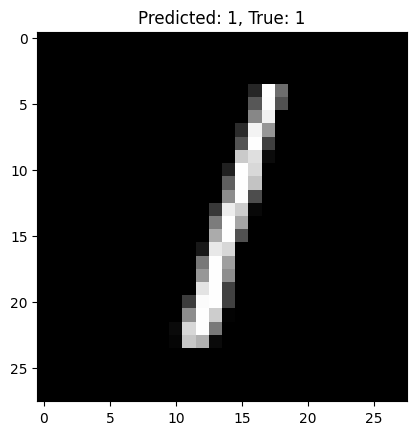

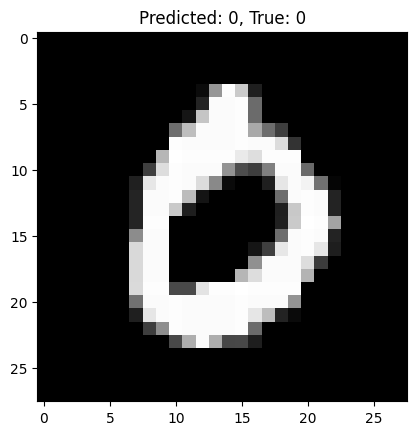

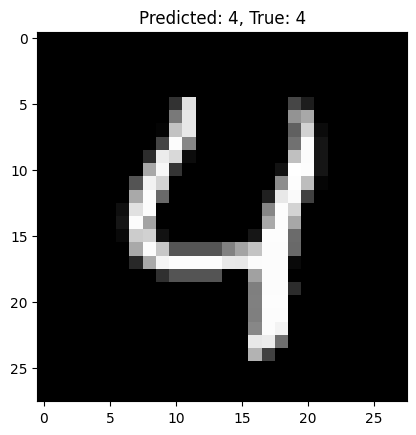

In [25]:
for i in range(5):
    image = x_test[i].reshape(28, 28)
    predicted_label = predicted_labels[i]
    true_label = np.argmax(y_test[i])
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()